# Filter methods for feature selection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import (
    f_classif,
    SelectFpr,
    SelectKBest,
)
from sklearn.model_selection import train_test_split

In [2]:
# load dataset

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


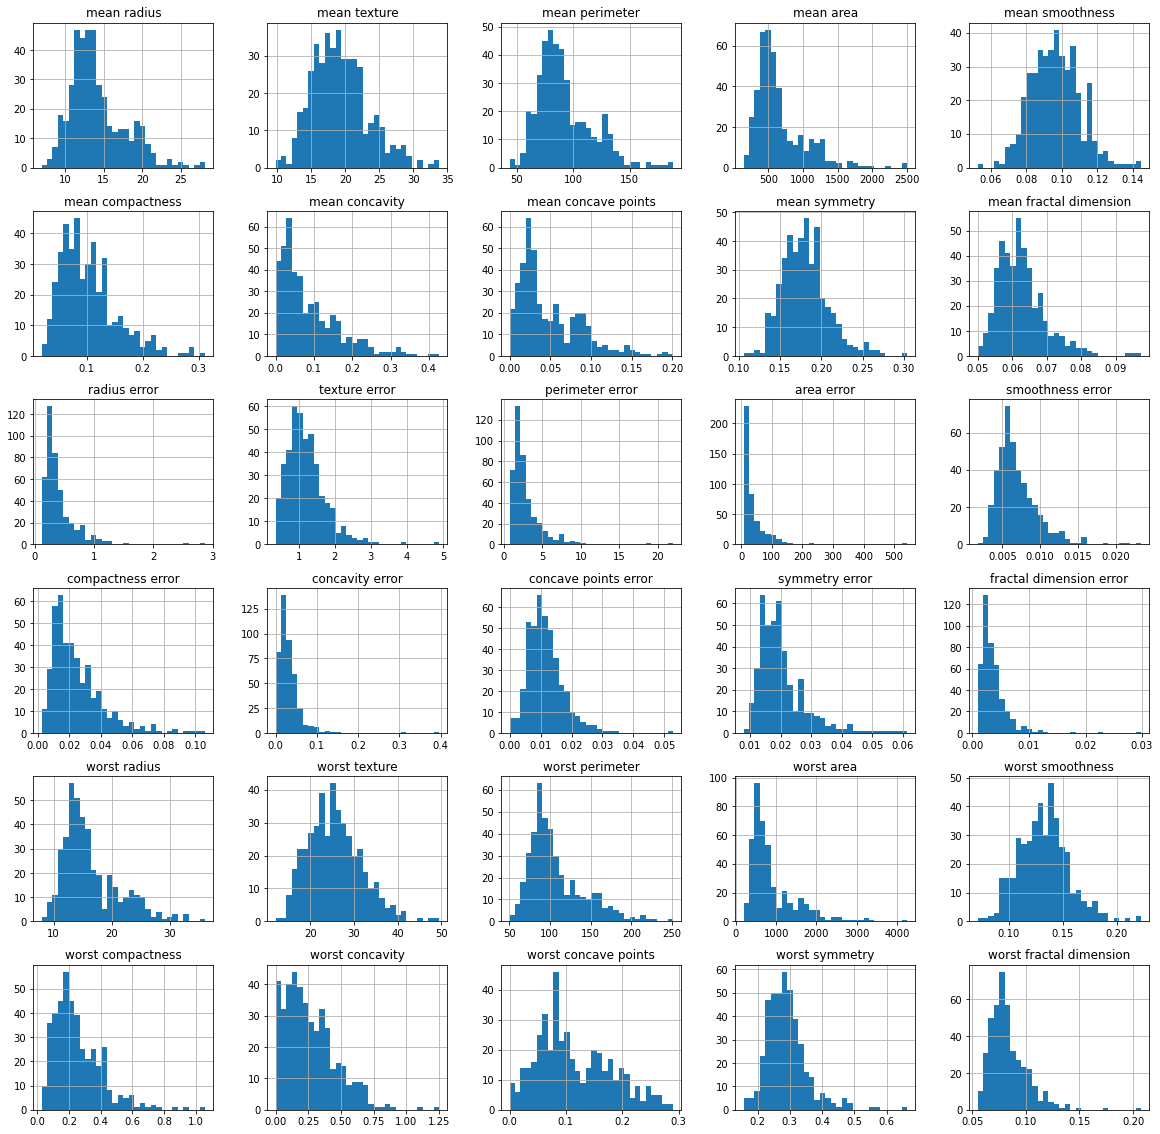

In [3]:
X_train.hist(bins=30, figsize=(20,20))
plt.show()

# Exercise:

Calculate the correlation (np.corrcoef) between inputs and outputs. Display the calculated values.
Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

In [4]:
# Exercise 1

corr = np.corrcoef(X_train,y_train,rowvar=False)
print(corr)

[[ 1.          0.30365798  0.99814323  0.98680116  0.16879046  0.50696487
   0.66715767  0.8212003   0.13282172 -0.33484499  0.68197159 -0.13840748
   0.67811351  0.73023271 -0.23010682  0.17896515  0.12530527  0.32754592
  -0.14022112 -0.049791    0.96882532  0.27224701  0.96524542  0.9405672
   0.1207165   0.40861121  0.51162057  0.73158057  0.14828739 -0.00353903
  -0.72018594]
 [ 0.30365798  1.          0.3099524   0.30580874 -0.01340177  0.22615499
   0.28835074  0.28401809  0.07387158 -0.0846885   0.26130977  0.38068539
   0.26674134  0.24543571  0.00825771  0.17101273  0.09506122  0.11732284
  -0.03116459  0.03336618  0.33813013  0.90661301  0.34299493  0.3369971
   0.09893983  0.26178598  0.28852548  0.27670658  0.09559268  0.10437175
  -0.40005826]
 [ 0.99814323  0.3099524   1.          0.98639446  0.20243341  0.55396703
   0.7039867   0.84830337  0.16481933 -0.28937829  0.69405012 -0.12846455
   0.69479952  0.73925583 -0.20863862  0.22159695  0.15593433  0.35845117
  -0.12269

<AxesSubplot:>

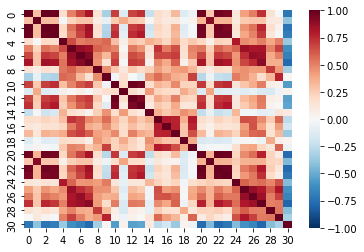

In [5]:
# Plot correlation matrix

df = pd.DataFrame(corr)

# Crear la gráfica utilizando Seaborn
sns.heatmap(df, cmap="RdBu_r", center=0, vmax=1,vmin=-1)

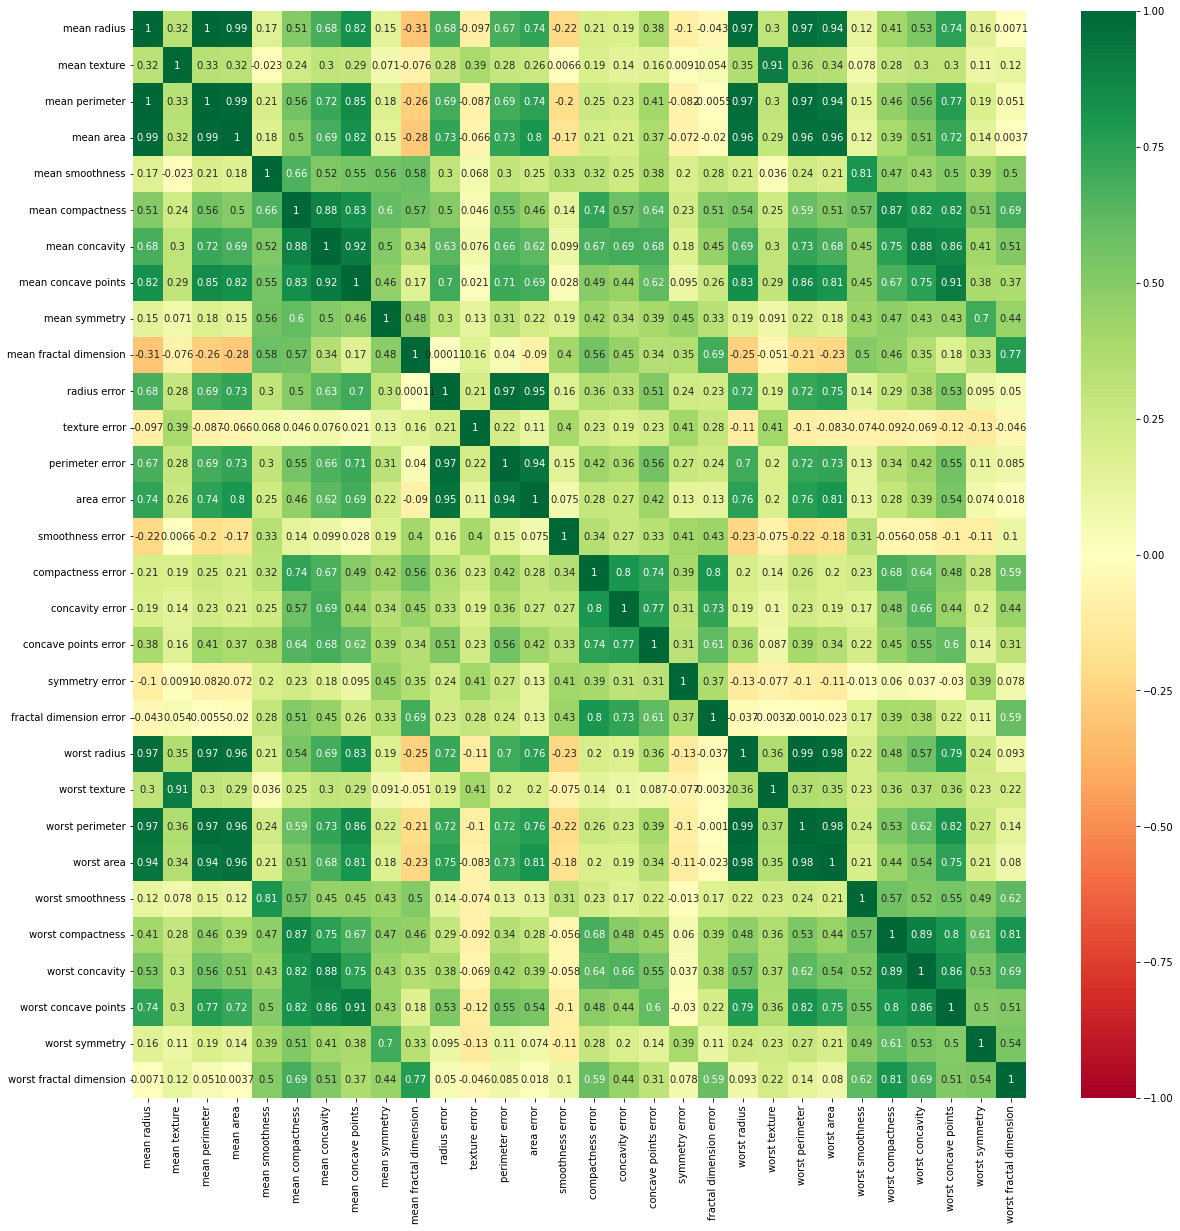

In [6]:
# HEATMAP: get correlations of each features in dataset using the seaborn library

corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn",vmax=1,vmin=-1)

# Mutual information (MI) between input and output variables

First let us calculate the MI. By definition we know that the MI between two **discrete** variables $X,Y$ is given by

$$ \textrm{MI}(X,Y) = \sum_{y\in \mathcal{Y}}\sum_{x\in \mathcal{X}} p(x,y)\log\left(\frac{p(x,y)}{p(x)p(y)}\right) $$

More info:  https://en.wikipedia.org/wiki/Mutual_information


The MI can be calculated using the `sklearn.feature_selection.mutual_info_classif` function from scikit learn.

In [7]:
# Exercise: Mutual information between X and Y
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X_train,y_train)

array([0.33030141, 0.08150594, 0.39536373, 0.3503949 , 0.09368696,
       0.25630413, 0.36764971, 0.44955866, 0.08141019, 0.02161436,
       0.24659659, 0.        , 0.25299295, 0.33399285, 0.01424276,
       0.06048611, 0.12099279, 0.14688397, 0.        , 0.05092975,
       0.44276438, 0.12296645, 0.46046965, 0.45111359, 0.07881806,
       0.23458226, 0.30924557, 0.44179455, 0.06988156, 0.01859968])

### In scikit learn we have a function to select the best `k` variables, `SelectKBest`. This together with the `mutual_info_classif` function allows us to select groups of variables.

#### Exercise:
Use `sklearn.feature_selection.SelectKBest` and `mutual_info_classif` to automatically select the `k` best variables.

In [8]:
# Exercise
# Use `sklearn.feature_selection.SelectKBest` 

from sklearn.feature_selection import SelectKBest

selector = SelectKBest(mutual_info_classif, k=3)
X_new = selector.fit_transform(X_train, y_train)

# Ver las variables seleccionadas
print("Variables seleccionadas:", selector.get_support(indices=True))


Variables seleccionadas: [ 7 22 23]


In [9]:
# Show the selected features

print("Variables seleccionadas:", breast_cancer.feature_names[selector.get_support(indices=True)])

Variables seleccionadas: ['mean concave points' 'worst perimeter' 'worst area']


* There are other statistics that can be used in classification problems:
    - `f_classif`: ANOVA test between X, y.
    - `chi2`: $chi^2$ (chi-squared) statistic between X, y.
* For regression problems we can use `mutual_info_regression` or `f_regression`.

In [10]:
# Exercise
# Apply SelectKBest class to extract top `k` best features with chi2
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=3)
X_new = selector.fit_transform(X_train, y_train)

# Ver las variables seleccionadas
print("Variables seleccionadas:", selector.get_support(indices=True))



Variables seleccionadas: [ 3 13 23]


In [11]:
# Show the selected features and compare with the previous method

print("Variables seleccionadas:", breast_cancer.feature_names[selector.get_support(indices=True)])

Variables seleccionadas: ['mean area' 'area error' 'worst area']


En ambos modelos hemos acabado utilizando la variable `worst area`. Las otras dos variables no coinciden.

## ANOVA statistics 
Compares the mean across groups. Each group is the data for each target class.

In [12]:
# on the entire data

univariate = f_classif(X_train, y_train)

# the output is one array with f-scores and one array with the p-values

univariate

(array([4.56888468e+02, 8.07899168e+01, 4.90890258e+02, 3.94647061e+02,
        6.91090732e+01, 2.51091933e+02, 3.77169033e+02, 6.40392388e+02,
        5.64534892e+01, 2.32061889e-01, 1.89198831e+02, 4.60132652e-01,
        1.77794821e+02, 1.61603286e+02, 3.44368683e+00, 3.19209297e+01,
        1.52804441e+01, 6.90719571e+01, 3.73129536e-01, 1.22007037e+00,
        6.11484676e+02, 1.04059005e+02, 6.34234486e+02, 4.60094540e+02,
        9.71806726e+01, 2.42990980e+02, 3.24298240e+02, 7.30475928e+02,
        9.36811856e+01, 4.94480861e+01]),
 array([2.55823842e-69, 8.37108067e-18, 8.19690935e-73, 1.48052645e-62,
        1.27734112e-15, 9.49913611e-45, 1.45377554e-60, 8.98762428e-87,
        3.44436651e-13, 6.30247708e-01, 7.43308506e-36, 4.97932018e-01,
        4.06310902e-34, 1.36320509e-31, 6.41875480e-02, 2.94961572e-08,
        1.07859166e-04, 1.29817853e-15, 5.41630631e-01, 2.69973265e-01,
        3.11012794e-84, 5.36444219e-22, 3.08095116e-86, 1.18230031e-69,
        8.87987480e-21

Text(0.5, 1.0, 'Anova')

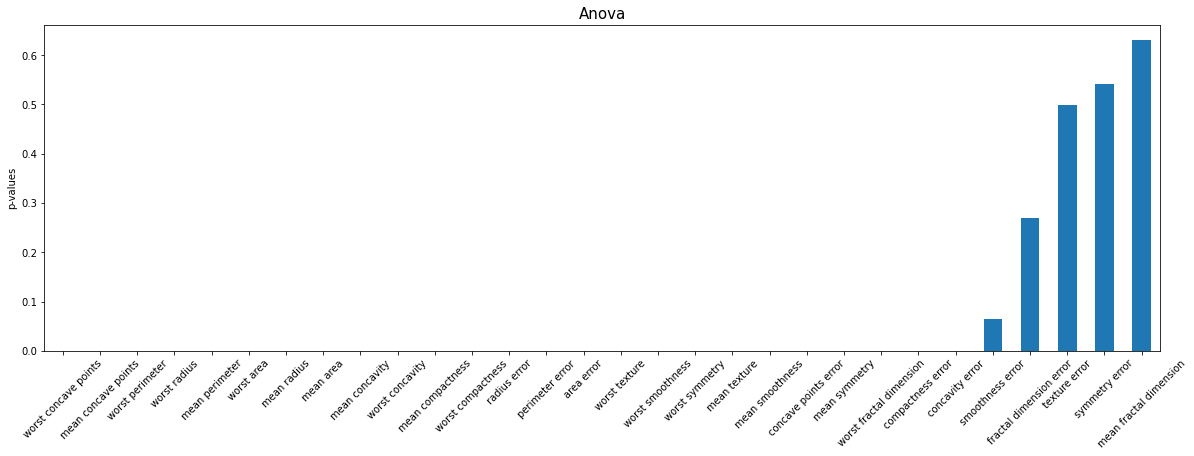

In [13]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

plt.rc('axes', titlesize=15) 
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel('p-values')
plt.title('Anova')

The smaller the p_value the more predictive the feature is.

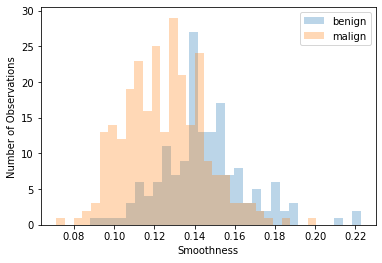

In [14]:

sample1 = X_train.loc[y_train==0, "worst smoothness"]
sample2 =  X_train.loc[y_train==1, "worst smoothness"]

plt.hist(sample1, bins=30, alpha=0.3, label="benign")
plt.hist(sample2, bins=30, alpha=0.3, label="malign")
plt.legend(loc='upper right')
plt.xlabel('Smoothness')
plt.ylabel('Number of Observations')
plt.show()

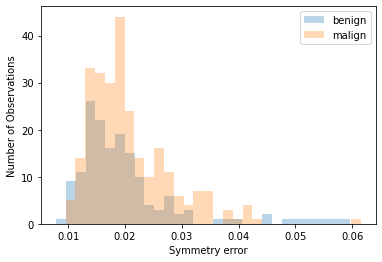

In [15]:
# variable with big p-value

sample1 = X_train.loc[y_train==0, "symmetry error"]
sample2 =  X_train.loc[y_train==1, "symmetry error"]

plt.hist(sample1, bins=30, alpha=0.3, label="benign")
plt.hist(sample2, bins=30, alpha=0.3, label="malign")
plt.legend(loc='upper right')
plt.xlabel('Symmetry error')
plt.ylabel('Number of Observations')
plt.show()

## Select features based on p-values

In [16]:
# select features with p-value < 0.05

sel = SelectFpr(f_classif, alpha=0.0000000000000005).fit(X_train, y_train)

# Display selected feature names
X_train.columns[sel.get_support()]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'],
      dtype='object')

In [17]:
# Number of selectead features

len(sel.get_feature_names_out())

19

In [18]:
# remove low ranking features:

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

In [19]:
# sklearn returns numpy arrays. Convert to dataframe

X_train_t = pd.DataFrame(X_train_t, columns=sel.get_feature_names_out())
X_test_t = pd.DataFrame(X_test_t, columns=sel.get_feature_names_out())

X_train_t.head()

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry
0,11.85,17.46,75.54,432.7,0.05642,0.026880,0.022800,0.2070,1.234,13.88,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101
1,11.22,19.86,71.94,387.3,0.06779,0.005006,0.007583,0.2976,1.959,19.62,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292
2,20.13,28.25,131.20,1261.0,0.10340,0.144000,0.097910,0.7655,5.203,99.04,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572
3,13.59,17.84,86.24,572.3,0.04052,0.019970,0.012380,0.2580,1.683,22.22,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335
4,16.69,20.20,107.10,857.6,0.07112,0.036490,0.023070,0.2473,1.775,22.95,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677


## Select top ranking features

In [20]:
sel = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# Display selected feature names
X_train.columns[sel.get_support()]

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')

In [21]:
# remove low ranking features:

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

In [22]:
# sklearn returns numpy arrays. Convert to dataframe

X_train_t = pd.DataFrame(X_train_t, columns=sel.get_feature_names_out())
X_test_t = pd.DataFrame(X_test_t, columns=sel.get_feature_names_out())

X_train_t.head()

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points
0,11.85,75.54,432.7,0.026880,0.022800,13.06,84.35,517.8,0.13160,0.09140
1,11.22,71.94,387.3,0.005006,0.007583,11.98,76.91,436.1,0.01335,0.02022
2,20.13,131.20,1261.0,0.144000,0.097910,23.69,155.00,1731.0,0.32150,0.16280
3,13.59,86.24,572.3,0.019970,0.012380,15.50,98.91,739.1,0.10600,0.05185
4,16.69,107.10,857.6,0.036490,0.023070,19.18,127.30,1084.0,0.24770,0.08737


# Exercise
Train a classifier (e.g. an SVM) to compare its performance with all features and after applying feature selection. 
Also try reducing the number of selected features by modifying the p-value threshold and comment appropriately on the results.

In [23]:
from sklearn import svm
from sklearn import metrics

model = svm.SVC(C=2,kernel='linear')

model.fit(X_train,y_train)

accuracy = model.score(X_test, y_test)
print("Accuracy con todos los datos:", accuracy)

# La mejor accuracy encontrada es con C=2

Accuracy con todos los datos: 0.965034965034965


Con todos los datos hemos obtenido una precisión máxima en el test del 96.5%.

A continuación seleccionamos las `k` mejores variables según el test ANOVA. Elegimos diferentes valores de `k` y comentamos los diferentes valores de precisión.

In [24]:
model = svm.SVC(C=4,kernel='linear')

sel = SelectKBest(f_classif, k=20).fit(X_train, y_train)
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

model.fit(X_train_t,y_train)

accuracy = model.score(X_test_t, y_test)
print("Accuracy con 20 variables:", accuracy)

# La mejor accuracy encontrada es con C=4 y obtenemos el mismo accuracy pese a eliminar 10 variables    

Accuracy con 20 variables: 0.965034965034965


In [25]:
model = svm.SVC(C=5,kernel='linear')

sel = SelectKBest(f_classif, k=10).fit(X_train, y_train)
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

model.fit(X_train_t,y_train)

accuracy = model.score(X_test_t, y_test)
print("Accuracy con 10 variables:", accuracy)

# La mejor accuracy encontrada es con C=5 y obtenemos un accuracy muy cercano, aunque ahora hemos eliminado 20 variables    

Accuracy con 10 variables: 0.951048951048951


In [26]:
model = svm.SVC(C=5,kernel='linear')

sel = SelectKBest(f_classif, k=5).fit(X_train, y_train)
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

model.fit(X_train_t,y_train)

accuracy = model.score(X_test_t, y_test)
print("Accuracy con 5 variables:", accuracy)

# La mejor accuracy encontrada es con C=5 y obtenemos un accuracy ya más alejado, ahora hemos eliminado 25 variables    

Accuracy con 5 variables: 0.9370629370629371


In [27]:
model = svm.SVC(C=1,kernel='linear')

sel = SelectKBest(f_classif, k=3).fit(X_train, y_train)
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

model.fit(X_train_t,y_train)

accuracy = model.score(X_test_t, y_test)
print("Accuracy con 3 variables:", accuracy)

# La mejor accuracy encontrada es con C=1 y obtenemos un accuracy mejor que con 5 variables, ahora hemos eliminado 27 variables    

Accuracy con 3 variables: 0.9440559440559441


In [28]:
model = svm.SVC(C=3,kernel='linear')

sel = SelectKBest(f_classif, k=1).fit(X_train, y_train)
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

model.fit(X_train_t,y_train)

accuracy = model.score(X_test_t, y_test)
print("Accuracy con 1 variable:", accuracy)

# La mejor accuracy encontrada es con C=3 y obtenemos un accuracy bastante decente para solo tener 1 variable, ahora hemos eliminado 29 variables!!!!  

Accuracy con 1 variable: 0.916083916083916


En el último caso hemos eliminado todas las variables menos una, pero no hace falta llegar tan lejos. En el caso de eliminar 27 variables, es decir, quedarnos con 3 hemos perdido aproximadamente solo un 2% de precisión sobre el test. Es un resultado más que aceptable.


# Exercise
Perform feature extraction with PCA + SVM classifier and compare the results 

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = svm.SVC(C=2,kernel='linear')
model.fit(X_train_pca,y_train)
accuracy = model.score(X_test_pca, y_test)
print("Accuracy con 20 componentes:", accuracy)

Accuracy con 20 componentes: 0.965034965034965


In [30]:
pca = PCA(n_components=10)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = svm.SVC(C=9,kernel='linear')
model.fit(X_train_pca,y_train)
accuracy = model.score(X_test_pca, y_test)
print("Accuracy con 10 componentes:", accuracy)

Accuracy con 10 componentes: 0.9230769230769231


In [31]:
pca = PCA(n_components=5)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = svm.SVC(C=1,kernel='linear')
model.fit(X_train_pca,y_train)
accuracy = model.score(X_test_pca, y_test)
print("Accuracy con 5 componentes:", accuracy)

Accuracy con 5 componentes: 0.9300699300699301


In [32]:
pca = PCA(n_components=3)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = svm.SVC(C=4,kernel='linear')
model.fit(X_train_pca,y_train)
accuracy = model.score(X_test_pca, y_test)
print("Accuracy con 3 componentes:", accuracy)

Accuracy con 3 componentes: 0.9300699300699301


In [34]:
pca = PCA(n_components=1)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = svm.SVC(C=4,kernel='linear')
model.fit(X_train_pca,y_train)
accuracy = model.score(X_test_pca, y_test)
print("Accuracy con 1 componente:", accuracy)

Accuracy con 1 componente: 0.916083916083916


Aplicando PCA hemos reducido bastante el número de variables sacrificando muy poca precisión. Además la selección de características nos ofrece resultados muy similares (incluso mejores en este caso) a los obtenidos mediante la PCA, pero manteniendo la fácil interpretación. 